# L1 - Градиентый спуск и линейные модели

### 1. Линейные модели

Пусть есть обучающая выборка $\{x_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{R}^{n}$, при этом каждому объекту в соответсвие поставлена метка класса $y_{i} \in \{-1, +1\}$. Мы предполагаем, что в пространтсве $\mathbb{R}^{n}$ существует гиперплоскость, которая относительно некоторой метрики "хорошо" разделяет объекты на два класса. При этом гиперплоскость задается параметрически:

<center>
$wx + b = 0$
</center>

Объект $x$ имеет метку $y = +1$, если $wx + b \geq 0$ и $y = -1$ в ином случае. Вектор $w$ является нормалью к гиперплоскости, указывающий с какой стороны находятся объекты класса $y = +1$.

### 2. Обучение

Поиск модели ограничен до одного семейства, заданного параметрически. Обучение в таком случае сводится к задаче оптимизации эмпирического риска

<center>
$\arg \min_{\theta} Q(\theta) = \arg \min_{\theta} \frac{1}{l}\sum_{i=1}^{\mathcal{l}} \mathcal{L}(a(x_i|\theta), y_i)$, где
</center>

* $a(x|\theta)$ - алгоритм из некотрого семейства, заданный параметром $\theta$
* $\theta$ - вектор пространства параметров
* $\mathcal{L}$ - функция потерь, которая показывает на сколько точно предсказание

Очевидно, что качество предсказания зависит от выбранной модели. Но также оно зависит и от выбора функции потерь $\mathcal{L}$, которая существенно влияет на процесс обучения.

### 3. Функция потерь

В литературе можно встретить такое понятие, как отступ
<center>$ M(x, y) = y\cdot(wx + b)$,</center>
его можно трактовать, как уровень удаление от гиперплоскости в сторону своего класса. Это позволит нам кратко записывать функции потерь.

Наиболее естественной функцией потерь для задачи классификации является относительное количество неправильных классификаций, то есть
<center>$ \mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}] = [M(x, y_{true}) < 0]$</center>

Решение такой задачи является очень трудоемким, поэтому на практике производят оптимизацию реклаксированной ошибки.

К примеру **квадратичная ошибка**

<center>$ Q(w) = \frac{1}{\mathcal{l}} \sum_{i=1}^{\mathcal{l}}((wx_i+b) - y_i)^{2}$</center>

Она многим хороша, к примеру, в задачи оптимизации все сводится к выпуклому функционалу с локальным минимумом. Если представить, что признаки объекта $x_i$ записаны в матрицу $X$ построчно, а все метки записаны в вектор-столбец $Y$, то задача выглядит

<center>
$\arg\min_{w}||Xw - Y ||_{2}$,
</center>

и имеет аналитическое решение

<center>
$w = (X^TX)^{-1}X^TY$.
</center>

**Задание**

1. Сгенерируйте на плоскости 2 облака точек. Они должны слегка пересекаться, а точки внутри распределены нормально.
2. Обучите линейную модель, разделяющую два облака точек, использую формулу выше.
3. Изобразите облака с помощью библиотеки matplotlib, воспользуйтесь функцией scatter, для удобства точки можно сделать прозрачными.
4. Постройте полученнную разделяющую прямую.
5. Оцените сложность алгоритма обучения.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

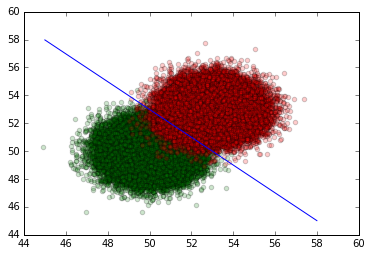

In [2]:
NUM_SAMPLES = 50000
first=np.random.normal(50,1,(NUM_SAMPLES,2))
second=np.random.normal(53,1,(NUM_SAMPLES,2))
plt.scatter(first.T[0],first.T[1],c='green',alpha=0.2)
plt.scatter(second.T[0],second.T[1],c='red',alpha=0.2)
X=np.concatenate((np.concatenate((first,second),),np.ones(2*NUM_SAMPLES).reshape(2*NUM_SAMPLES,1)),axis=1)
Y=np.concatenate((np.ones(NUM_SAMPLES),-np.ones(NUM_SAMPLES)))
w=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
xx = np.linspace(45, 58, 2)
yy = np.array(-w[2]/w[1] - w[0]/w[1]*xx)
plt.plot(xx, yy.T, color='b')

5.

Еще популярна следующая релаксация
<center>$Q(w) = \frac{1}{\mathcal{l}} \sum_{i=1}^{\mathcal{l}} max(0, 1 - y_i\cdot(wx_i + b))$,</center>
если хотите узнать об этом более подробно, то вам стоит почитать про svm (support vector machine).

Логистическая функция же обладает вероятностным смыслом

<center>$ Q(w) = \frac{1}{\mathcal{l}} \sum_{i=1}^{\mathcal{l}} \ln(1 + \exp(-y_i\cdot(wx_i + b)))$</center>
В частности данный функционал приводит нас к оптимальному байесовскому классификатору при некоторых допущениях о распределении признаков. Но это совершенно отдельная история.

**Задание**

1. Пусть $\mathbb{P}\{y=1|x\} = \sigma(wx+b)$, где $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Покажите, что задача
<center>$ \arg\min_{w, b} \sum_{x, y} \ln(1 + \exp(-y(wx + b)))$</center>
есть ничто иное, как максимазиция правдоподобия.
2. Отобразите все функционалы качества в осях $M \times Q$ для одного элемента.

1.test

2.

### 4. Градиентный спуск

Для задачи оптимизации не всегда существует аналитическое решение, либо оно может быть очень сложным. В таком случае используют численные методы. Да, речь идет именно о градиентном спуске. Это итеративный алгоритм, который устроен следующим образом. Пусть есть $Q(x)$, которую необходимо оптимизировать и она дифференцируема. Тогда задачу

<center>$ \arg\min_{x} Q(x)$</center>

можно решить следующим образом

<center>$ x^{k+1} = x^{k} - \lambda \cdot \triangledown Q(x)$,</center>

где $\lambda$ - некоторый шаг градиентного спуска, а $k$ - номер этого шага.

От выбора правильного $\lambda$ сильно зависит процесс обучения. Если взять слишком большое значение, то алгоритм может не сойтись. Если слишком малое, то обучение будет длиться долго. Также существует распространенный прием, применяемый часто при обучении нейросетей, уменьшать значение $\lambda$ в соответствии с некоторым расписанием.

**Задание**
1. Предложите какую-нибудь квадратичную функцию с глобальным минимумом.
2. Найдите минимум методом градиентного спуска.
3. Отобразите на плоскости линии уровней функции, которую вы оптимизируете.
4. Покажите, какую траекторию проходит алгоритм градиентного спуска.
5. Как вы выбрали значение $\lambda$?

[[  2.42484383e-11   3.23312511e-11]]


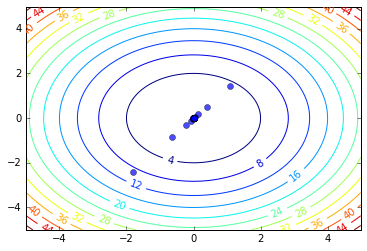

In [3]:
xx=np.arange(-5,5,0.01)
yy=np.arange(-5,5,0.01)
xgrid, ygrid = np.meshgrid(xx, yy)
zgrid=xgrid**2+ygrid**2
cont=plt.contour(xgrid, ygrid, zgrid,15)
cont.clabel(fmt="%.0f")

def grad_simple(x):
    return 2*x

def grad_descent_global_opt(w,grad,learning_rate,num_iters):
    for i in range(num_iters):
        w = w - learning_rate*grad(w)
        plt.plot(w[0][0],w[0][1],'bo',alpha=0.7)
    return w
x=np.random.randint(-7,7,(1,2))
print(grad_descent_global_opt(x,grad_simple,0.8,50))

Существуют функции, которые плохо даются градиентному спуску. К примеру, функция Розенброка

<center>$f(x, y) = (1-x)^2 + 100(y-x^2)^2$.</center>

**Задание**
1. Проделайте все то же самое для функции Розенброка.
2. Какую проблему вы наблюдаете?
3. Как ее можно решить?

[[-1.52238105  1.87069686]]


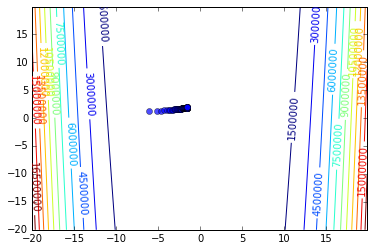

In [ ]:
xx=np.arange(-20,20,0.1)
yy=np.arange(-20,20,0.1)
xgrid, ygrid = np.meshgrid(xx, yy)
zgrid=(1-xgrid)**2+100*(ygrid-xgrid**2)**2
cont=plt.contour(xgrid, ygrid, zgrid,15)
cont.clabel(fmt="%.0f")

def grad_rosenbrock(x):
    return np.array([-2*(1-x[0][1])-400*x[0][0]*(-x[0][0]**2+x[0][1]),200*(-x[0][0]**2+x[0][1])])

x=np.random.randint(-10,10,(1,2))
print(grad_descent_global_opt(x,grad_rosenbrock,0.00001,100))

2.

3.

Существуют различные модификации алгоритма градиентного спуска. К примеру, метод наискорейшего спуска, где значение $\lambda$ зависит от шага

<center>$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k))$.</center>

**Задание**
1. Снова разделите облака точек, только теперь оптимизируйте квадратичную ошибку метода градиентного спуска.
2. Отобразите полученную прямую и облака точек.
3. Сравните ответ с точным решением.
4. Попробуйте метод наискорейшего спуска.
5. Постройте график в осях (номер шага и значение $Q$).
6. Сравните скорость сходимости обычного и наискорейшего спуска.

In [ ]:
def grad_descent_mse(w,x,y,learning_rate,num_iters):
    for i in range(num_iters):
        grad=x.dot(x.dot(w)-y)/x.size
        w-=grad
    return w
x=np.random.randint(-10,10,(3,1))
plt.scatter(first.T[0],first.T[1],c='green',alpha=0.2)
plt.scatter(second.T[0],second.T[1],c='red',alpha=0.2)
xx = np.linspace(45, 58, 2)
w=grad_descent_mse(x,X,Y,0.1,50)
yy = np.array(-w[2]/w[1] - w[0]/w[1]*xx)
plt.plot(xx, yy.T, color='b')

И еще немного о проблемах градиентного спуска. Если у нас есть какие-то признаки, которые встречаются достаточно редко, то соответствующий столбец будет разряженным.

**Задание**
В чем заключается проблема?

Также нужно понимать, что градиентный спуск может попасть в "ловушку" локального минимума. Обычно это актуально для нейросетей. Самый простой способо решить эту проблема - сдедать несколько запусков алгоритма или иметь какой-то инсайд, из какой точки стоит начинать.

### 5. Стохастический градиентный спуск

Иногда количество данных может быть так велико, что даже градиентный спуск начинает работать медленно. Или же данные просто поступают к нам большим потоком, а параметры модели постепенно меняются. Тогда на сцену выходит метод стохастического градиента.

Идея пределельно проста. Можно делать шаг спуска, вычисляя ошибку и градиент не для всех элементов выборки, а для какого-то небольшого количества или даже для одного объекта.

**Задание**

1. Скачайте данные mnist c [Kaggle](https://www.kaggle.com/c/digit-recognizer).
2. Обучите линейный классификатор 0 и 1, используйте логистическую функцию потерь.
3. Проверьте качество классификации на отложенной выборке.
<center>$ \mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}]$ </center>
4. Как влияет размер батча на скорость и качество обучения?
5. Отобразите графики, которые доказывает ваши слова (оси придумайте сами).
6. Сколько проходов по данным вы делаете? Почему?


У стохастического градиентного спуска также есть много всяких усовершествований, которые часто используются в реальной практике при обучении нейросетей.

Кстати, текущее значение $Q$ можно вычислять с помощью экспоненциального сглаживания.
<center>$Q^{k+1} = \gamma Q^k + (1 - \gamma) Q(x_{k+1})$, </center>

где $Q(x_{k+1})$ вычисляется для обрабатываемого батча.

**Задание**
1. Как зависит график от $\gamma$?
2. Каким способом лучше вычислять $Q$?

**Сохранение импульса**

Сохранения импульса позволяет избежать нам осциляции вдоль оси, по которой функция изменяется сильнее. Он заключается в том, что текущий градиентный шаг вычисляется на основе учета предыдущих шагов
<center> $x^{k+1} = x^{k} - s^{k}$,</center> где $s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k)$, при этом
 * $0 <\gamma < 1$ - коэффициент учета предыдущего импульса
 * $s^{-1} = 0$

**Задание**

1. Найдите минимум $Q(x, y) = 10x^2 + y^2$ c помощью обычного метода.
2. Воспользуйтесь методом сохранения импульса
3. Отобразите и сравните треки.
4. На основе чего вы выбрали $\gamma$?

**Ускоренный градиент Нестерова**

И логическое развитие этого подхода приводит к методу ускоренного градиента Нестерова. Шаг спуска вычисляется немного иначе
<center>$s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k - s^{k-1})$,</center>
то есть мы вычисляем градиент фукнции примерно в той точке, куда "занесет" нас накопленный импульс.

**Задание**

1. Сравните этот метод и предыдущий на функции Розенброка.
2. Отобразите и сравните треки.

**Adagrad (2011)**

Адаптивный градиент подразумевает вычисление $\lambda$ для каждой размерности входного вектора $x$. Неформально говоря, для разряженных признаков он делает больший шаг, а для обычных шаг поменьше.
<center> $x_{i}^{k + 1} = x_{i}^{k} - \frac{\lambda}{\sqrt{G_{i, i}^k } + \varepsilon} \cdot \frac{\partial Q}{\partial x_i}(x^k)$, где 
</center>


* $G^{k} = \sum_{t=1}^{k}g_t g_t^{T}$, где $g_t = \triangledown Q(x^t)$.
* $\varepsilon$ - небольшая добавка, чтобы избежать деление на ноль.

Как ни странно это улучшает сходимость процесса обучение, к примеру, при работе нейросетей с текстами.

**Задание**

1. Обучите модель этим способом для mnist.
2. Сравните сходимость с обычным стохастическим градиентным спуском (графики).

**RMSprop**

Чтобы избежать постоянный рост знаменателя при $\lambda$ можно воспользоваться следующим вариантом шага. Давайте будем подсчитывать матрицу $G^k$ только для какого-то небольшого количества последних шагов, это можно сделать к примеру с помощью экспоненциального сглаживания

<center>$G^{k+1} = \gamma G^{k} + (1 - \gamma)g_{k+1}g_{k+1}^{T}$, где</center>
$0< \gamma < 1$ - чем больше значение, тем большее количество последних элементов мы учитываем.

**Adadelta (2012)**

**Задание**
1. Изучите метод самостоятельно и кратко опишите.
2. Как вы можете его объяснить?

**Adam (2015)**

**Задание**
1. Попробуйте скомбинировать метод сохранения импульса и RMSprop.
2. Получили ли вы какое-то улучшение?
3. Почему?

**Задание**
1. Предложите некоторую функцию, которая наглядно показываеn отличие в работе всех предложенных методов.
2. Сделайте анимацию, которая пошагово отрисовывает треки все спусков.